Geometry: NDBR50, Epoch [100/1000], Loss: 0.0862
Geometry: NDBR50, Epoch [200/1000], Loss: 0.0858
Geometry: NDBR50, Epoch [300/1000], Loss: 0.0832
Geometry: NDBR50, Epoch [400/1000], Loss: 0.0833
Geometry: NDBR50, Epoch [500/1000], Loss: 0.0810
Geometry: NDBR50, Epoch [600/1000], Loss: 0.0832
Geometry: NDBR50, Epoch [700/1000], Loss: 0.0820
Geometry: NDBR50, Epoch [800/1000], Loss: 0.0828
Geometry: NDBR50, Epoch [900/1000], Loss: 0.0828
Geometry: NDBR50, Epoch [1000/1000], Loss: 0.0828
Geometry: NDBR6, Epoch [100/1000], Loss: 0.0835
Geometry: NDBR6, Epoch [200/1000], Loss: 0.0836
Geometry: NDBR6, Epoch [300/1000], Loss: 0.0826
Geometry: NDBR6, Epoch [400/1000], Loss: 0.0849
Geometry: NDBR6, Epoch [500/1000], Loss: 0.0838
Geometry: NDBR6, Epoch [600/1000], Loss: 0.0825
Geometry: NDBR6, Epoch [700/1000], Loss: 0.0827
Geometry: NDBR6, Epoch [800/1000], Loss: 0.0826
Geometry: NDBR6, Epoch [900/1000], Loss: 0.0836
Geometry: NDBR6, Epoch [1000/1000], Loss: 0.0796
Geometry: CHD6, Epoch [100/1

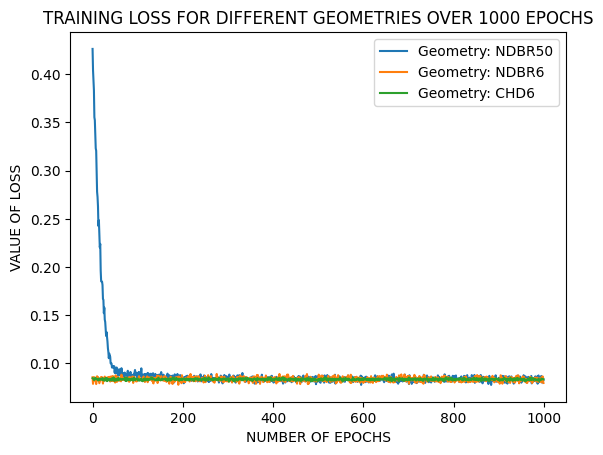

Predicted parameters for geometry NDBR50:
{'c1': 0.5007015466690063, 'c2': 0.5054038166999817, 'c3': 0.4967803657054901, 'c4': 0.5096643567085266, 'c5': 0.4998968243598938, 'c6': 0.5011917352676392, 'c7': 0.489047110080719}
Predicted parameters for geometry NDBR6:
{'c1': 0.5038102865219116, 'c2': 0.5106121897697449, 'c3': 0.5013187527656555, 'c4': 0.5024298429489136, 'c5': 0.4993712902069092, 'c6': 0.4972228705883026, 'c7': 0.4927513599395752}
Predicted parameters for geometry CHD6:
{'c1': 0.5001707077026367, 'c2': 0.504921555519104, 'c3': 0.5004490613937378, 'c4': 0.5032007098197937, 'c5': 0.503192663192749, 'c6': 0.5024889707565308, 'c7': 0.49108386039733887}


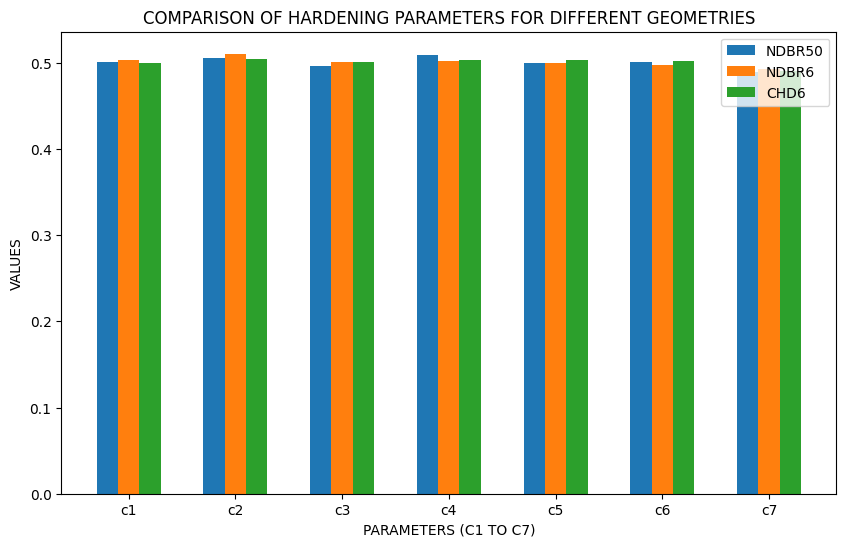

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

paramConfig = {
    'c1': {'lowerBound': 0, 'upperBound': 1, 'exponent': 1.0, 'name': 'W', 'unit': 'dimensionless', 'type': 'hardening'},
    'c2': {'lowerBound': 0, 'upperBound': 2, 'exponent': 1000.0, 'name': 'K', 'unit': 'MPa', 'type': 'yielding'},
    'c3': {'lowerBound': 0, 'upperBound': 1, 'exponent': 0.1, 'name': 'e0', 'unit': 'dimensionless', 'type': 'hardening'},
    'c4': {'lowerBound': 0, 'upperBound': 1, 'exponent': 1.0, 'name': 'n', 'unit': 'dimensionless', 'type': 'hardening'},
    'c5': {'lowerBound': 0, 'upperBound': 2, 'exponent': 1000.0, 'name': 'sigma_y', 'unit': 'MPa', 'type': 'yielding'},
    'c6': {'lowerBound': 0, 'upperBound': 1, 'exponent': 1000.0, 'name': 'sigma_sat', 'unit': 'MPa', 'type': 'hardening'},
    'c7': {'lowerBound': 0, 'upperBound': 1, 'exponent': 1000.0, 'name': 'b', 'unit': 'dimensionless', 'type': 'hardening'}
}

geometries = ['NDBR50', 'NDBR6', 'CHD6']

yieldingIndices = {'NDBR50': 200, 'NDBR6': 200, 'CHD6': 1200}

# Define a simple neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Define the number of input features, hidden units, and output dimensions
input_size = len(paramConfig)  # Number of input parameters
hidden_size = 64  # Number of hidden units
output_size = input_size  # Number of output dimensions (same as input for this case)

# Create an instance of the neural network
model = NeuralNetwork(input_size, hidden_size, output_size)

# Define a loss function (mean squared error) and an optimizer (e.g., Adam)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 1000  # Adjust the number of epochs as needed

# Lists to store loss values for each geometry
loss_lists = {geometry: [] for geometry in geometries}

for geometry in geometries:
    num_samples = yieldingIndices[geometry]  # Use the yielding index for the current geometry

    for epoch in range(num_epochs):
        # Generate random data
        X_train = torch.rand((num_samples, input_size))  # Random input data
        Y_train = torch.rand((num_samples, output_size))  # Random output data

        # Forward pass
        outputs = model(X_train)

        # Compute the loss
        loss = criterion(outputs, Y_train)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_lists[geometry].append(loss.item())

        if (epoch + 1) % 100 == 0:
            print(f'Geometry: {geometry}, Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the loss for each geometry in a single graph
for geometry in geometries:
    plt.plot(loss_lists[geometry], label=f'Geometry: {geometry}')

plt.xlabel('NUMBER OF EPOCHS')
plt.ylabel('VALUE OF LOSS')
plt.legend()
plt.title('TRAINING LOSS FOR DIFFERENT GEOMETRIES OVER 1000 EPOCHS')
plt.show()

# Predict parameters for all geometries
predicted_parameters = {}

for geometry in geometries:
    X_test = torch.rand((1, input_size))
    with torch.no_grad():
        predictions = model(X_test)

    # Convert predictions to a dictionary
    predicted_params = {param: value.item() for param, value in zip(paramConfig.keys(), predictions[0])}
    predicted_parameters[geometry] = predicted_params

# Print predicted parameters for all geometries
for geometry, params in predicted_parameters.items():
    print(f'Predicted parameters for geometry {geometry}:')
    print(params)

# Visualize 'c1' to 'c7' values for each geometry in a single graph with 'c1' to 'c7' on the x-axis
param_names = list(paramConfig.keys())
num_params = len(param_names)

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2
x = np.arange(len(param_names))

for i, geometry in enumerate(geometries):
    param_values = [predicted_parameters[geometry][param_name] for param_name in param_names]
    ax.bar(x + i * width, param_values, width=width, label=geometry)

ax.set_xlabel('PARAMETERS (C1 TO C7)')
ax.set_ylabel('VALUES')
ax.set_title('COMPARISON OF HARDENING PARAMETERS FOR DIFFERENT GEOMETRIES')
ax.set_xticks(x + width * (len(geometries) - 1) / 2)
ax.set_xticklabels(param_names)
ax.legend()

plt.show()
